<a href="https://colab.research.google.com/github/Winyuchonn/projectseacount/blob/main/pretrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Feb 26 08:19:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.8/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow

rf = Roboflow(api_key="k6PbDEnl3gyJrEVXz41W")
project = rf.workspace("test-ij2el").project("dip-seftr")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to dip-1 in yolov8:: 100%|██████████| 262/262 [00:00<00:00, 1510.01it/s]


In [6]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8x-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 batch=4

/content
100% 137M/137M [00:13<00:00, 11.1MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/datasets/dip-1/data.yaml, epochs=100, patience=50, batch=4, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, i

In [10]:
!ls {HOME}/runs/segment/train/

args.yaml					    train_batch0.jpg
BoxF1_curve.png					    train_batch1980.jpg
BoxP_curve.png					    train_batch1981.jpg
BoxPR_curve.png					    train_batch1982.jpg
BoxR_curve.png					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1677399866.1c44c3e73844.1356.0  val_batch0_labels.jpg
MaskF1_curve.png				    val_batch0_pred.jpg
MaskP_curve.png					    val_batch1_labels.jpg
MaskPR_curve.png				    val_batch1_pred.jpg
MaskR_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights


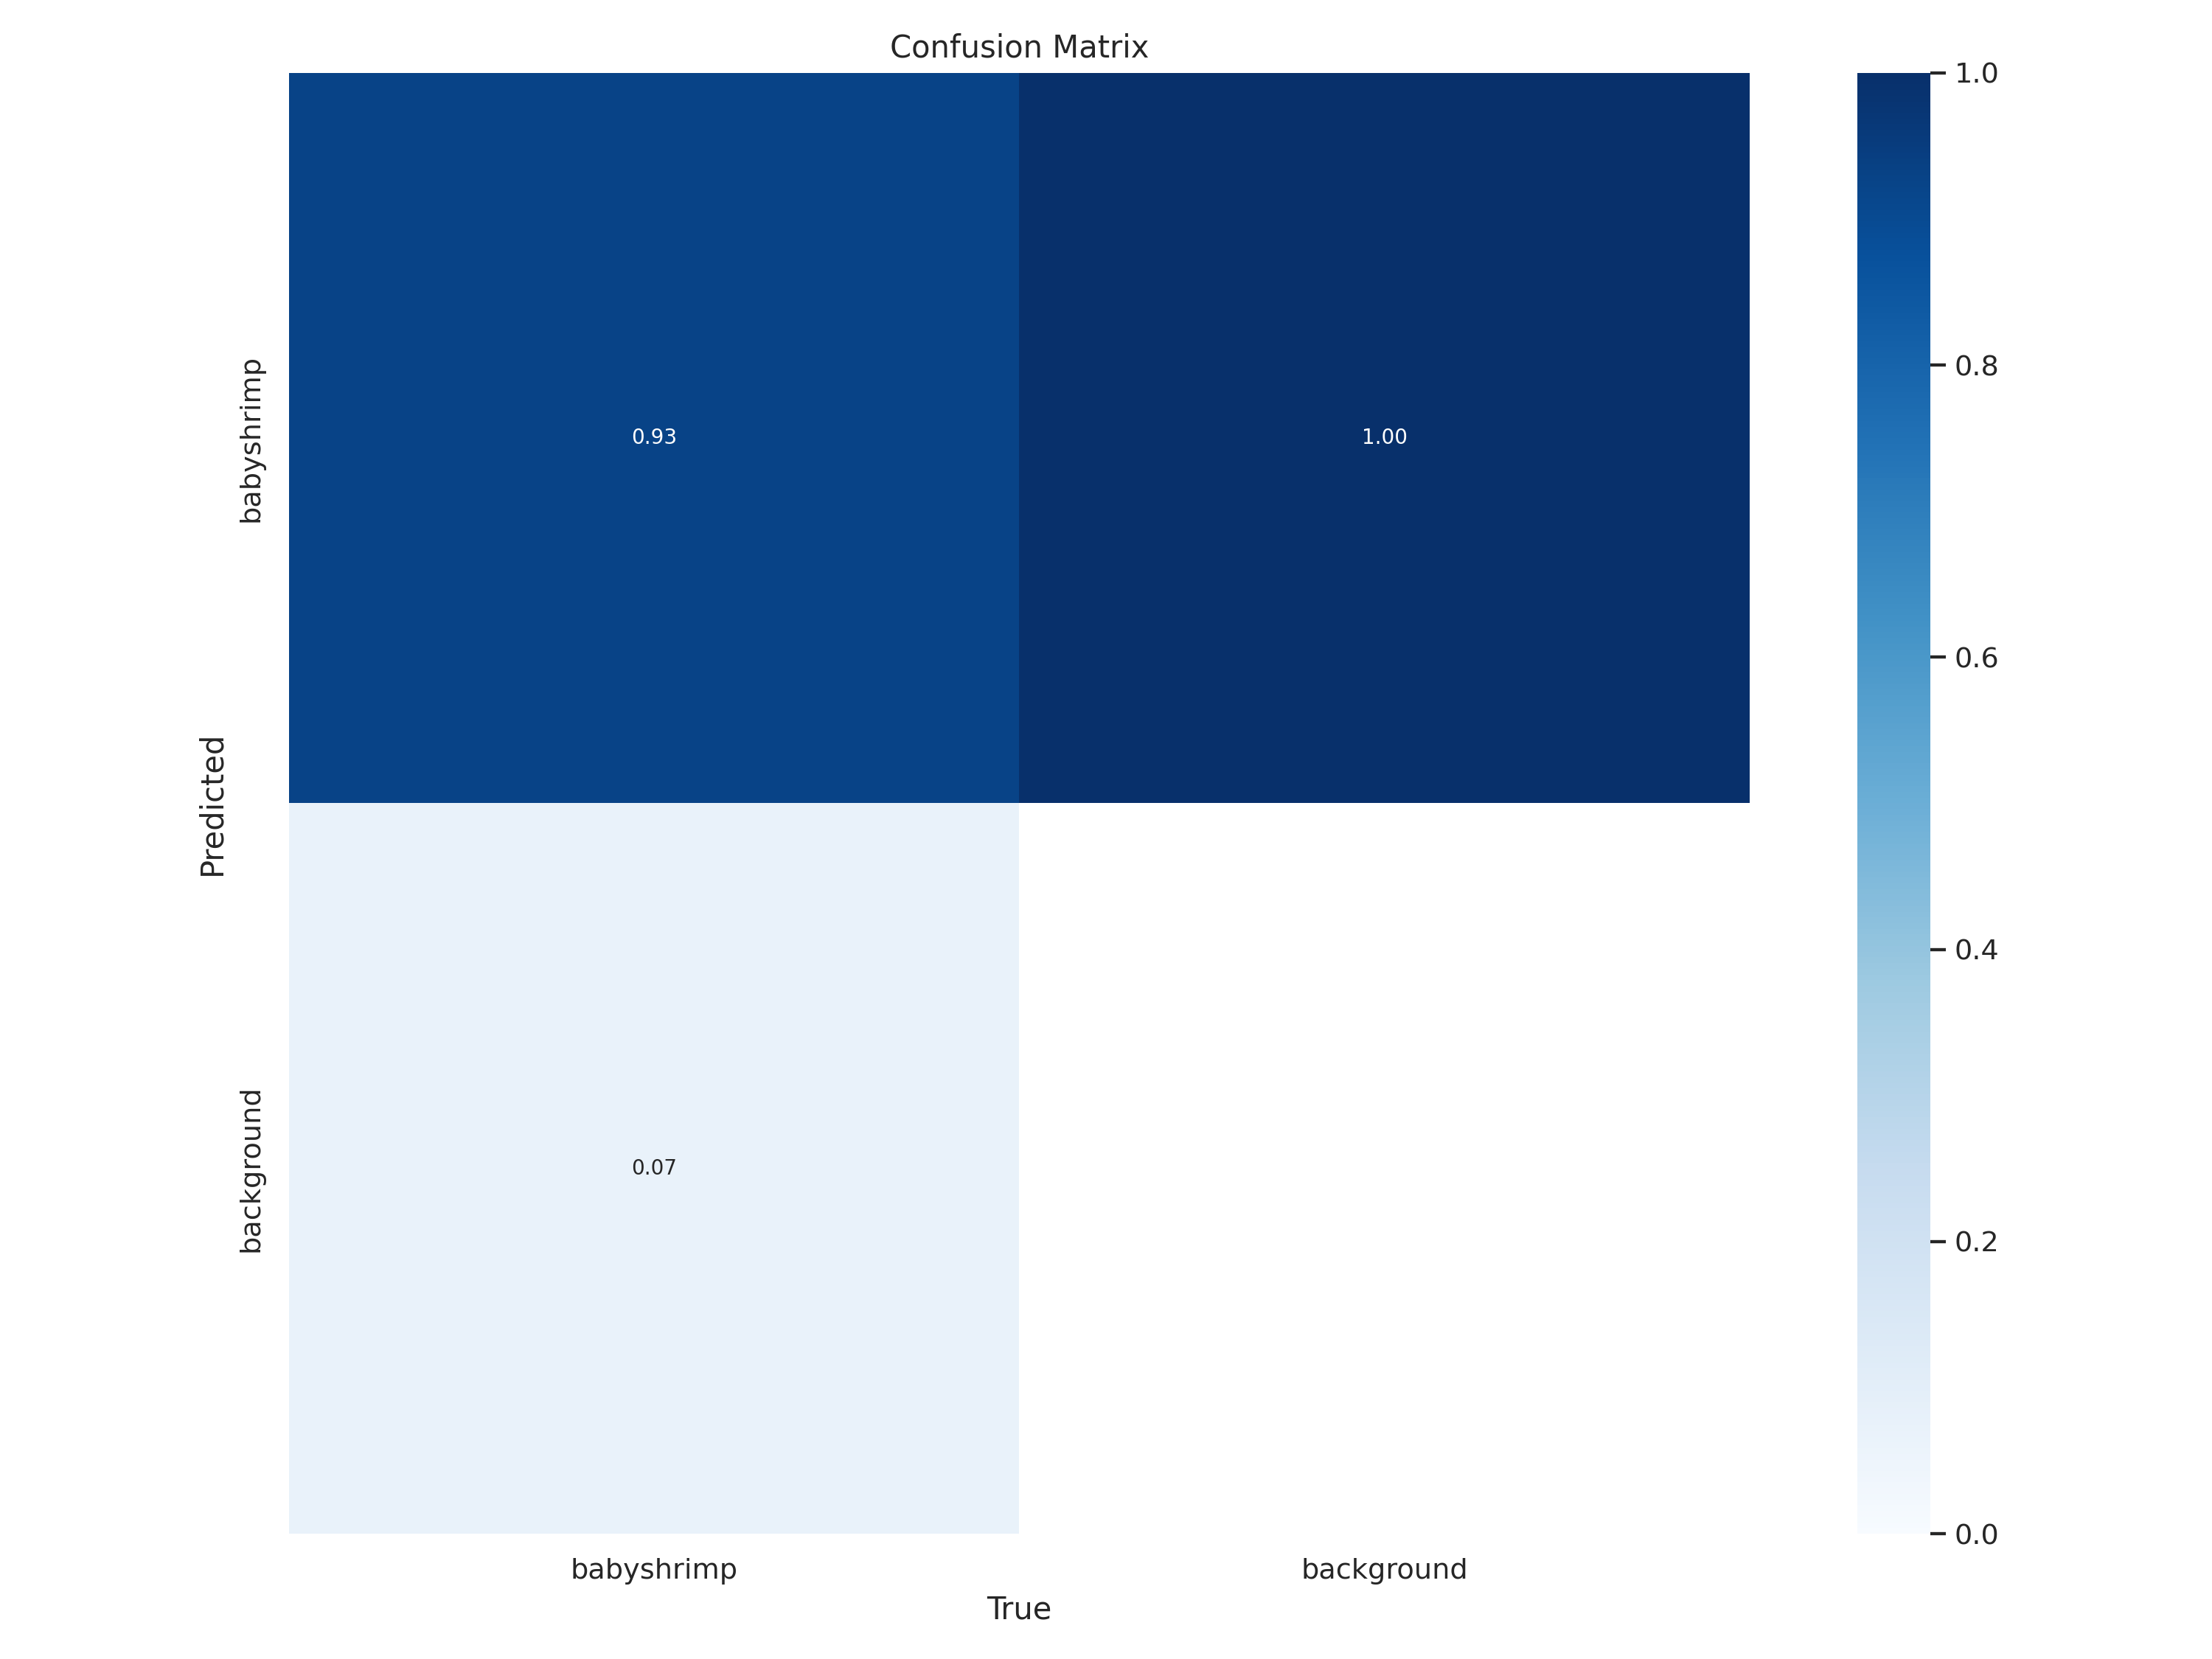

In [11]:
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=800)

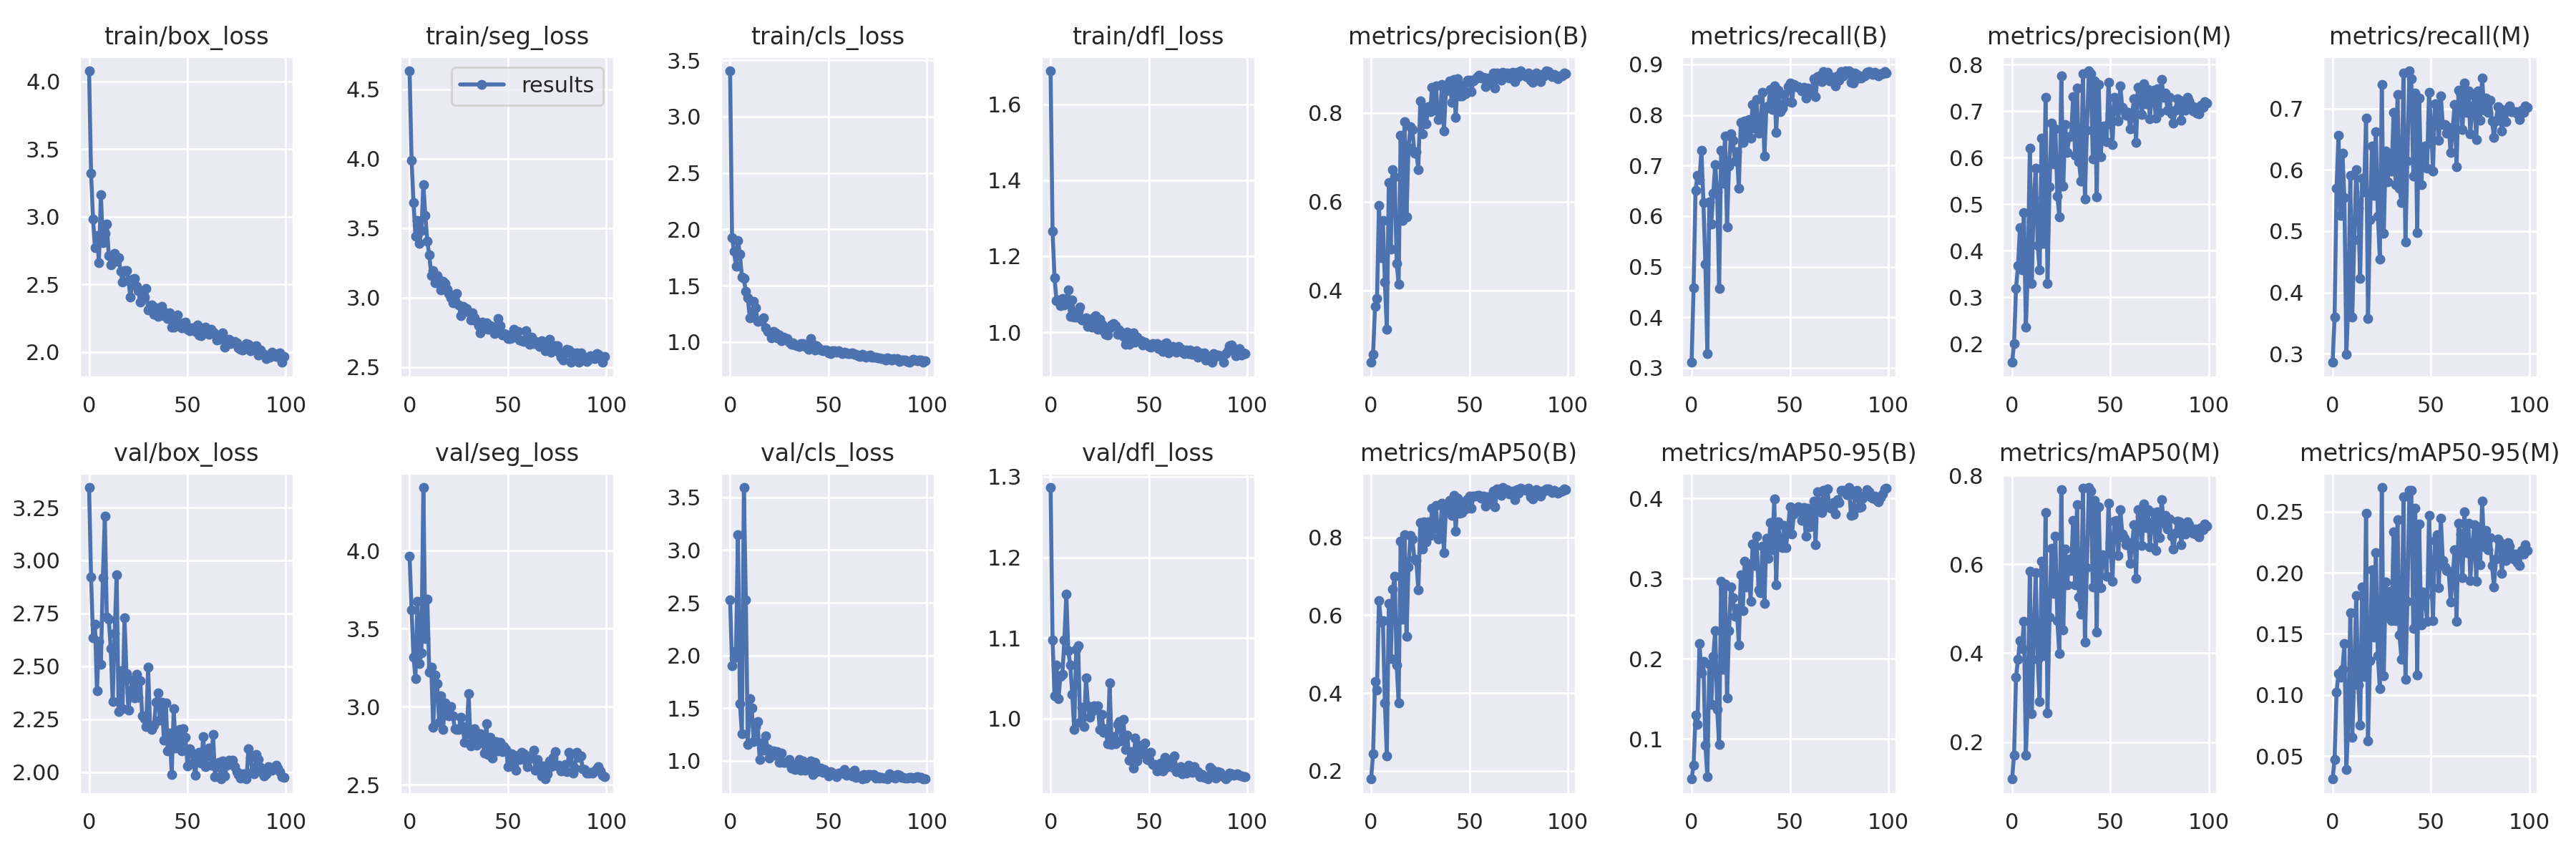

In [12]:
Image(filename=f'{HOME}/runs/segment/train/results.png', width=800)

In [13]:
!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71721619 parameters, 0 gradients, 343.7 GFLOPs
val: Scanning /content/datasets/dip-1/valid/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100% 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:09<00:00,  4.67s/it]
                   all         25       4198      0.894      0.888      0.927      0.413      0.746      0.735      0.724      0.241
Speed: 0.3ms pre-process, 76.4ms inference, 0.0ms loss, 1.3ms post-process per image


In [14]:
!yolo task=segment mode=predict model="/content/runs/segment/train/weights/best.pt" source=/content/datasets/dip-1/test/images save=true hide_labels=True hide_conf=False, conf=0.5  line_thickness=1 box=False max_det=300

Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71721619 parameters, 0 gradients, 343.7 GFLOPs

image 1/13 /content/datasets/dip-1/test/images/12_jpg.rf.c3c7bc02a9ed92f989d9f0c87b816a55.jpg: 640x640 130 babyshrimps, 115.9ms
image 2/13 /content/datasets/dip-1/test/images/1467_jpg.rf.353669d3a957bbe31b6fcbc5a0e37bd3.jpg: 640x640 136 babyshrimps, 67.5ms
image 3/13 /content/datasets/dip-1/test/images/1469_jpg.rf.e7c4e6c08a940770869aff4cd0c14f3d.jpg: 640x640 117 babyshrimps, 65.0ms
image 4/13 /content/datasets/dip-1/test/images/1470_jpg.rf.49e8a5ef0fb5504d2eb6eec4340c378d.jpg: 640x640 120 babyshrimps, 65.2ms
image 5/13 /content/datasets/dip-1/test/images/1473_jpg.rf.2331ed2736359a65864feaae7efd1e28.jpg: 640x640 115 babyshrimps, 65.6ms
image 6/13 /content/datasets/dip-1/test/images/1474_jpg.rf.561e18d43df60e5db5c2d30210df3f1c.jpg: 640x640 105 babyshrimps, 66.3ms
image 7/13 /content/datasets/dip-1/test/images/1478

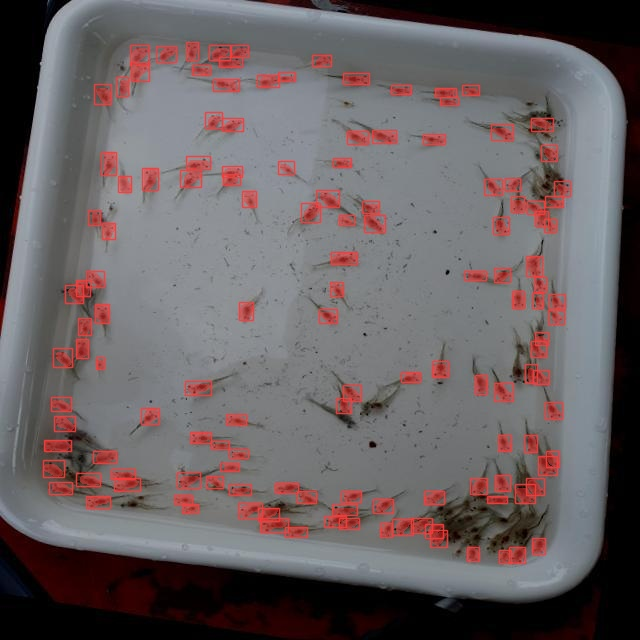

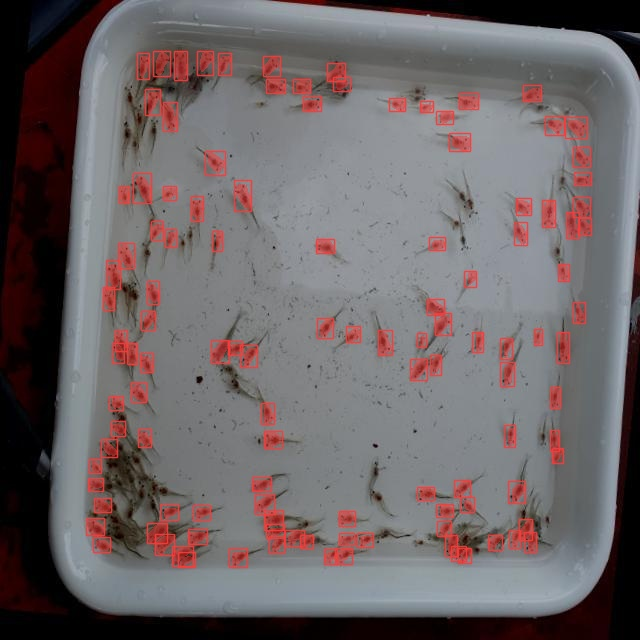

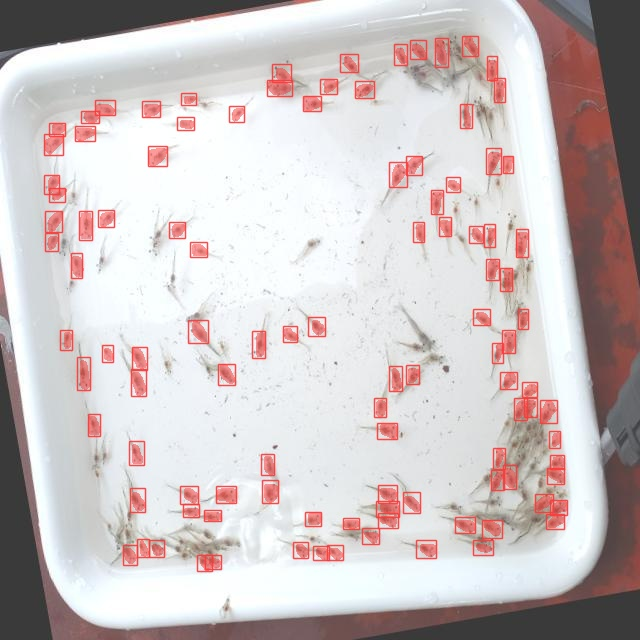

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")